* Mean Shift는 KDE(Kernel Density Estimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
* 별도의 군집화 개수를 지정하지 않으며 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함

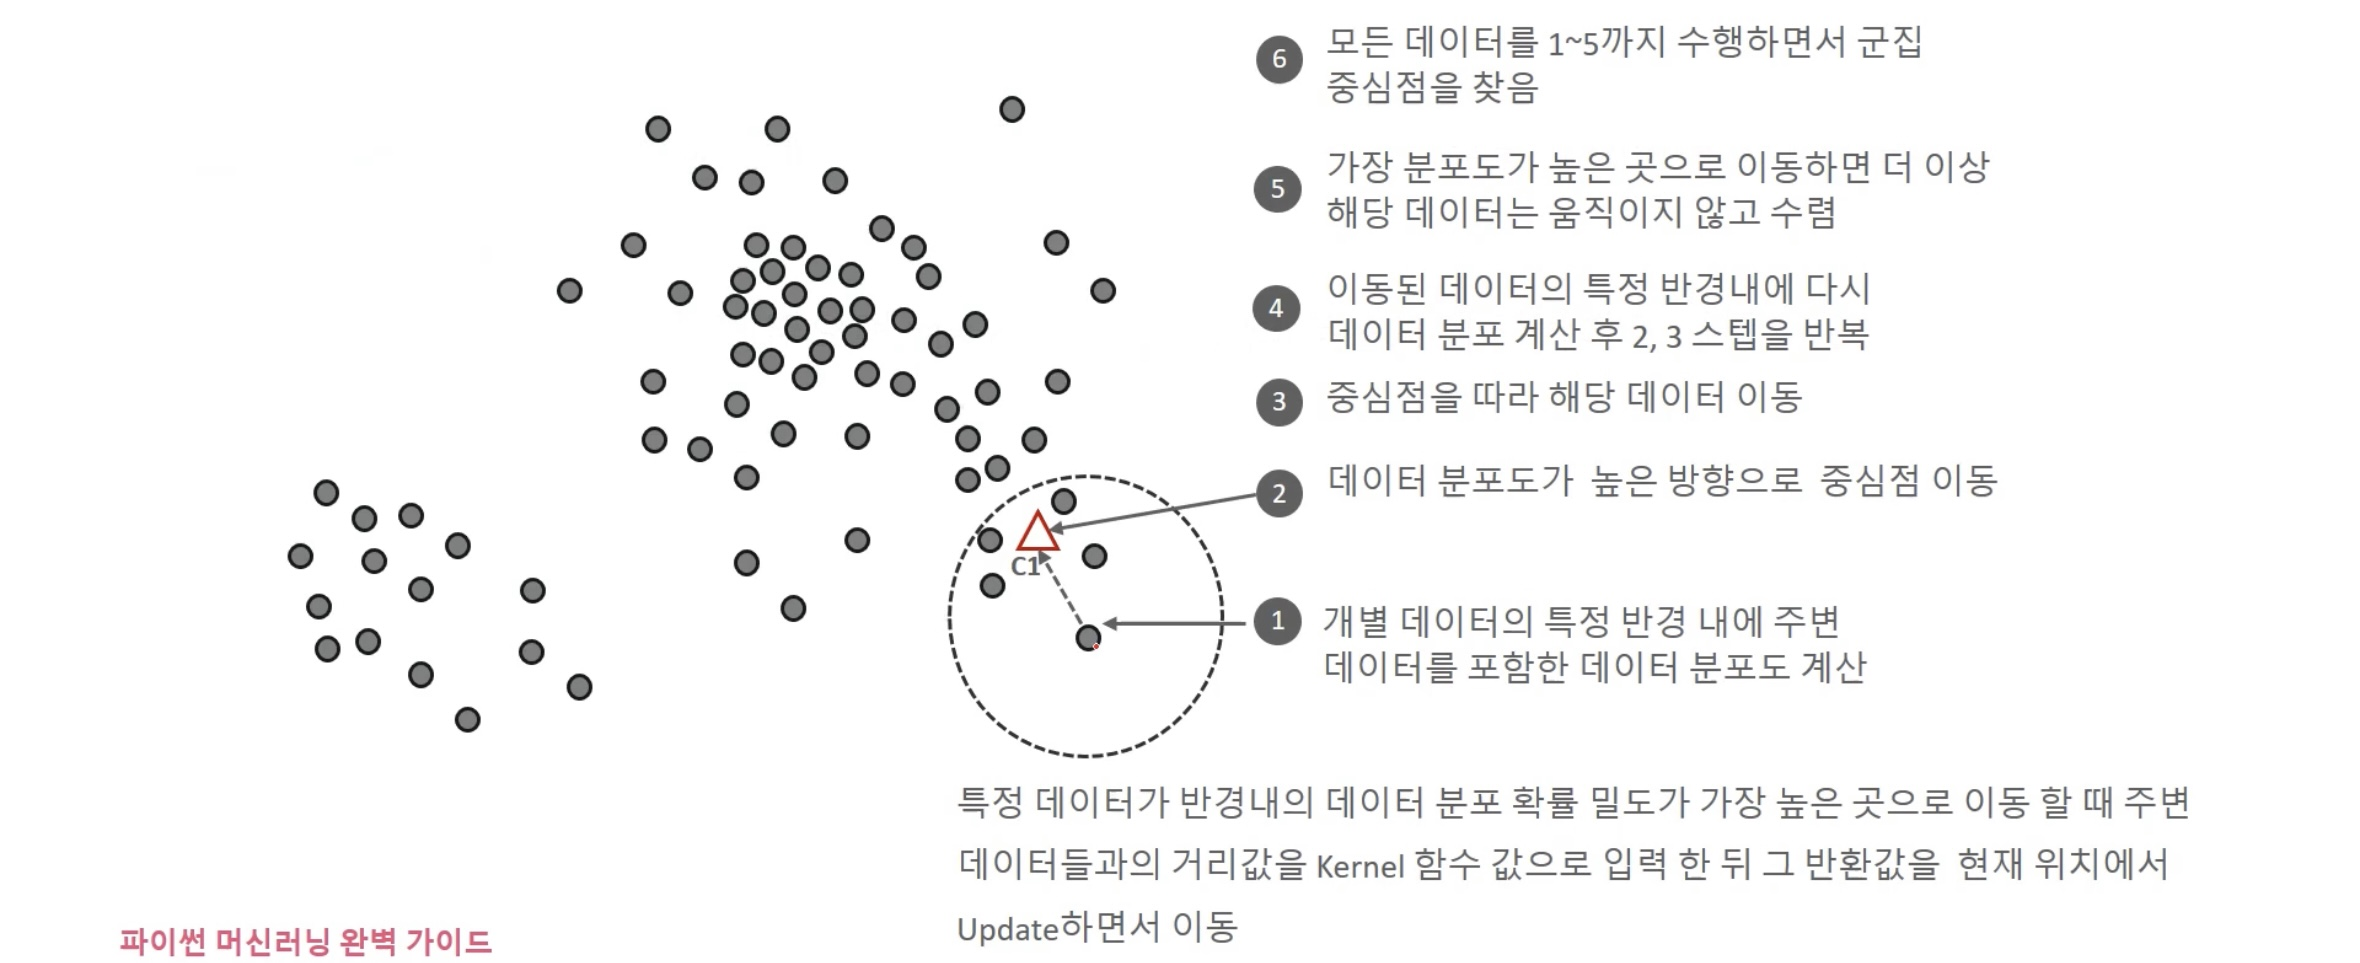

## KDE(Kernel Density Estimation)
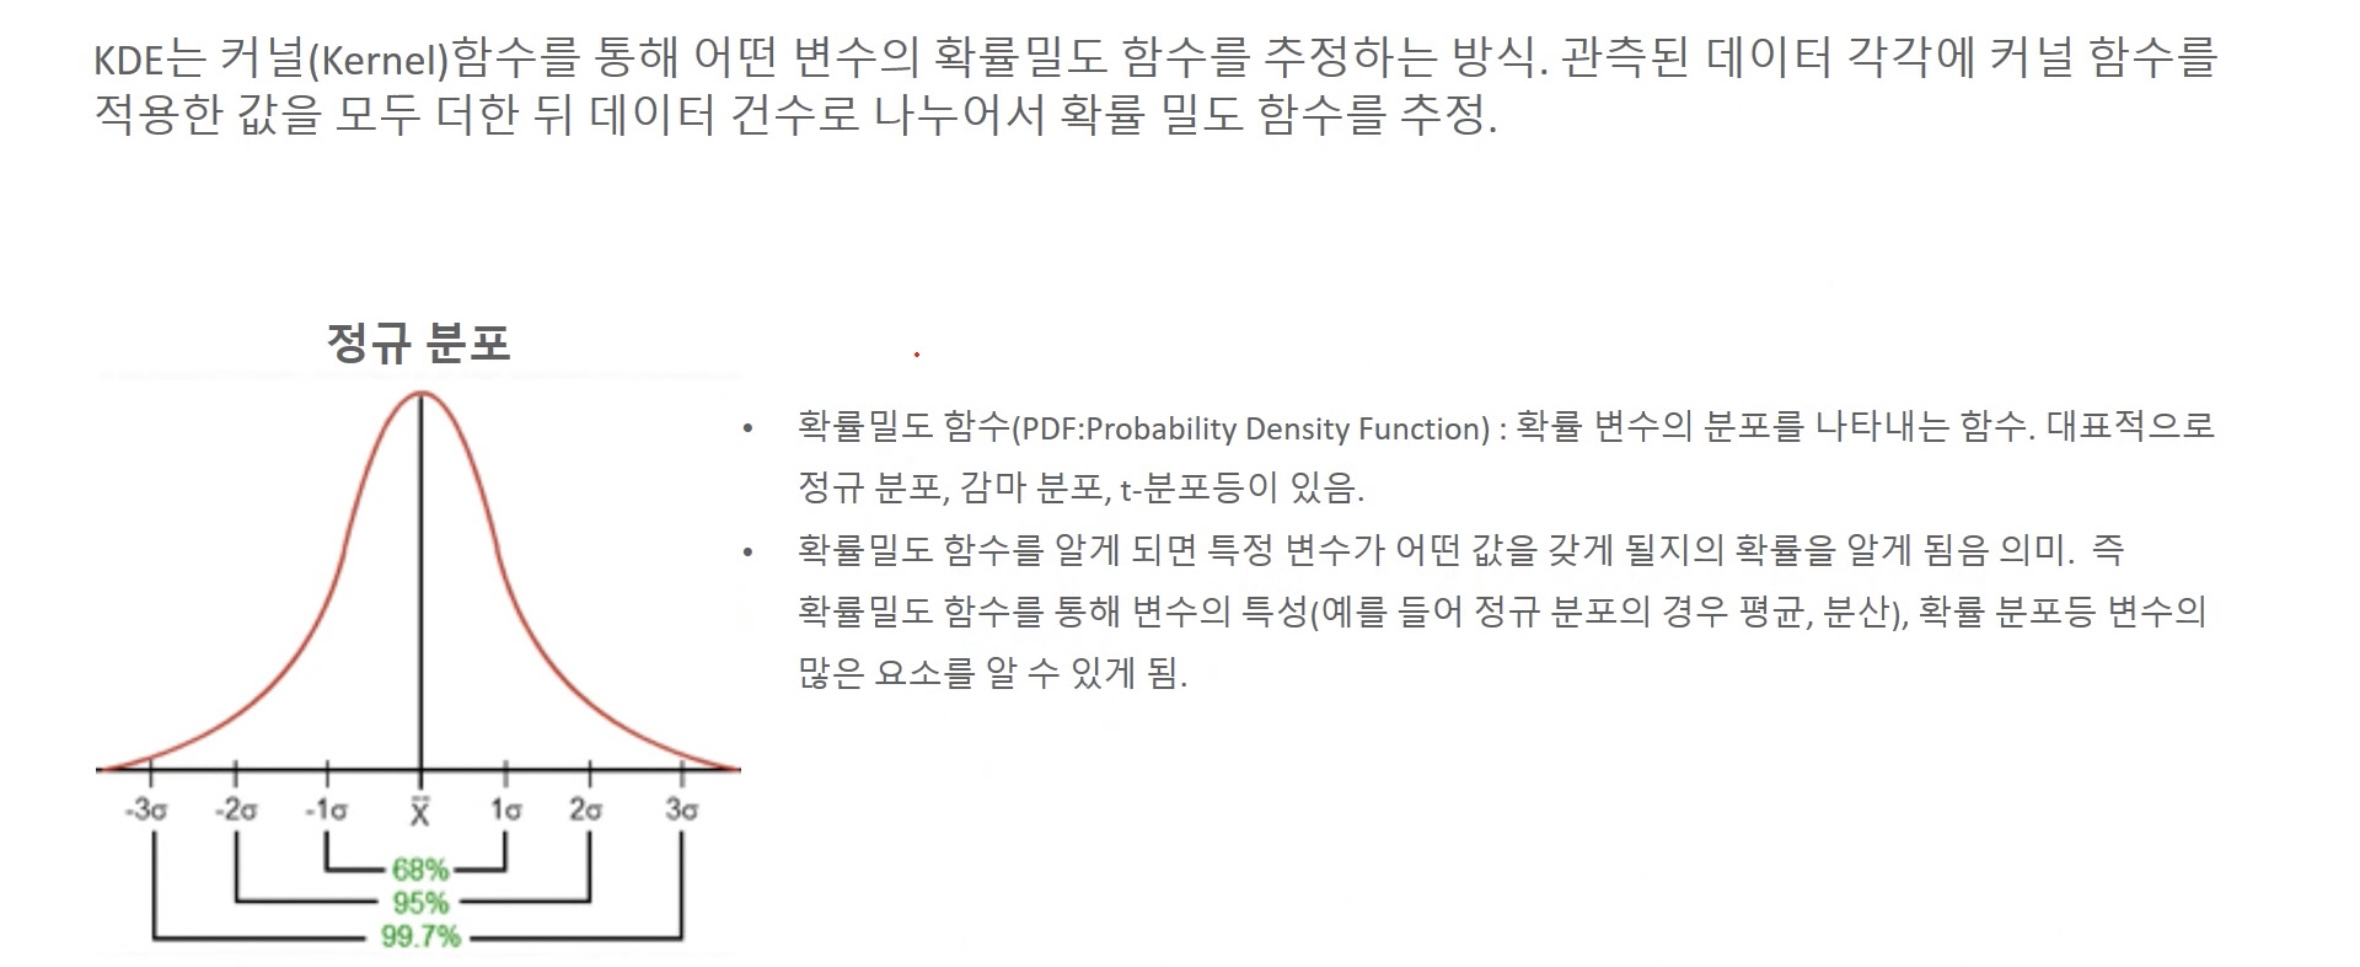

## 확률 밀도 추정 방법

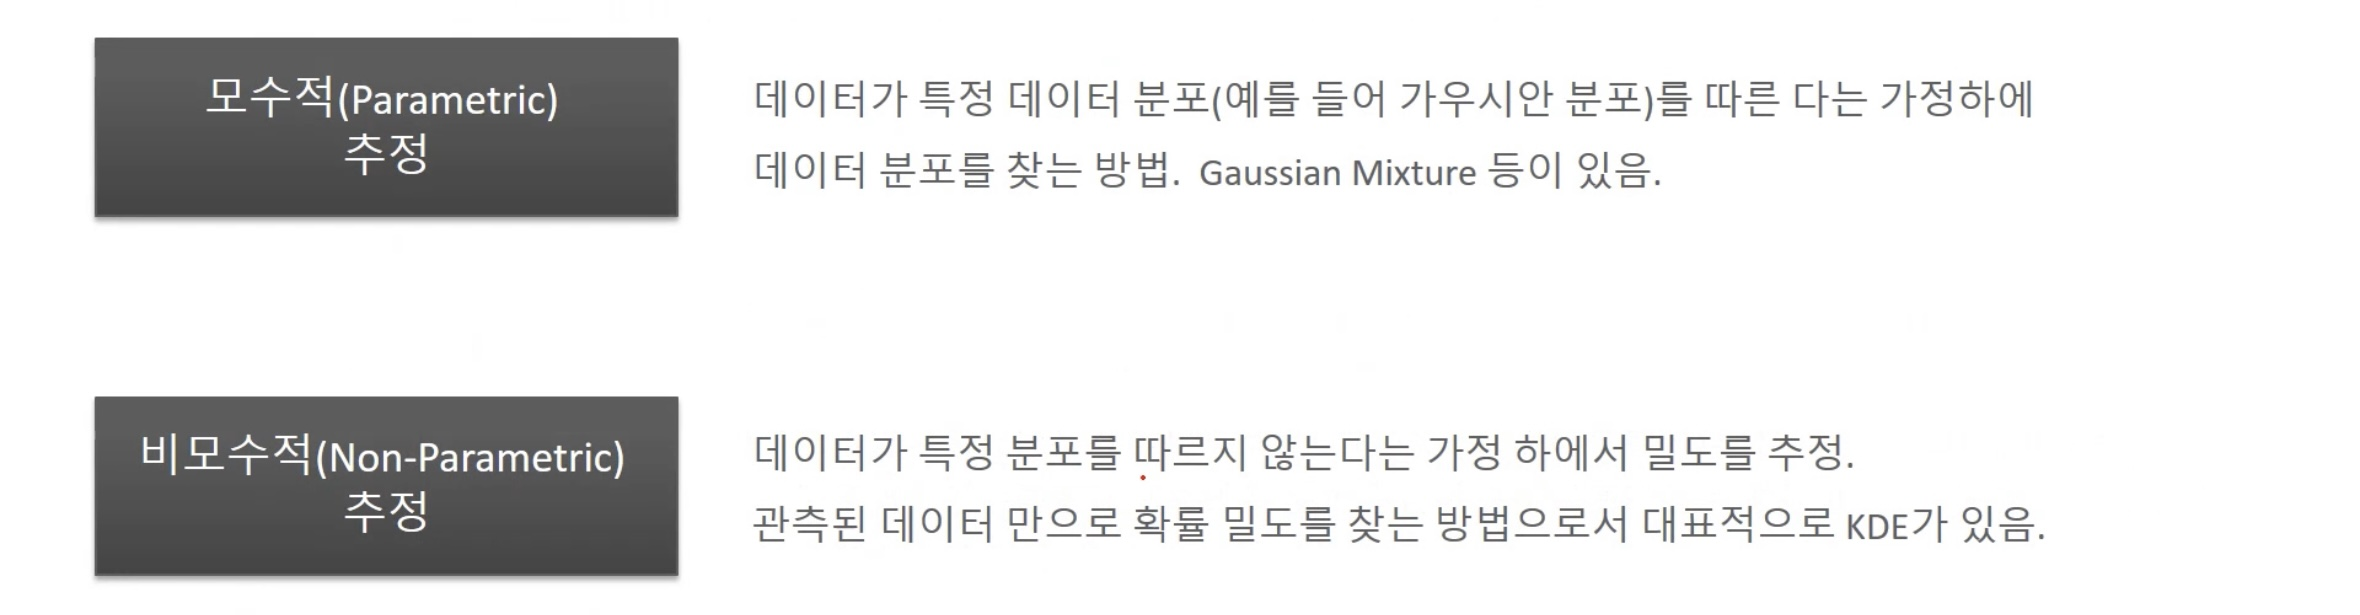

## 비모수적 밀도 추정 - 히스토그램(Histogram)

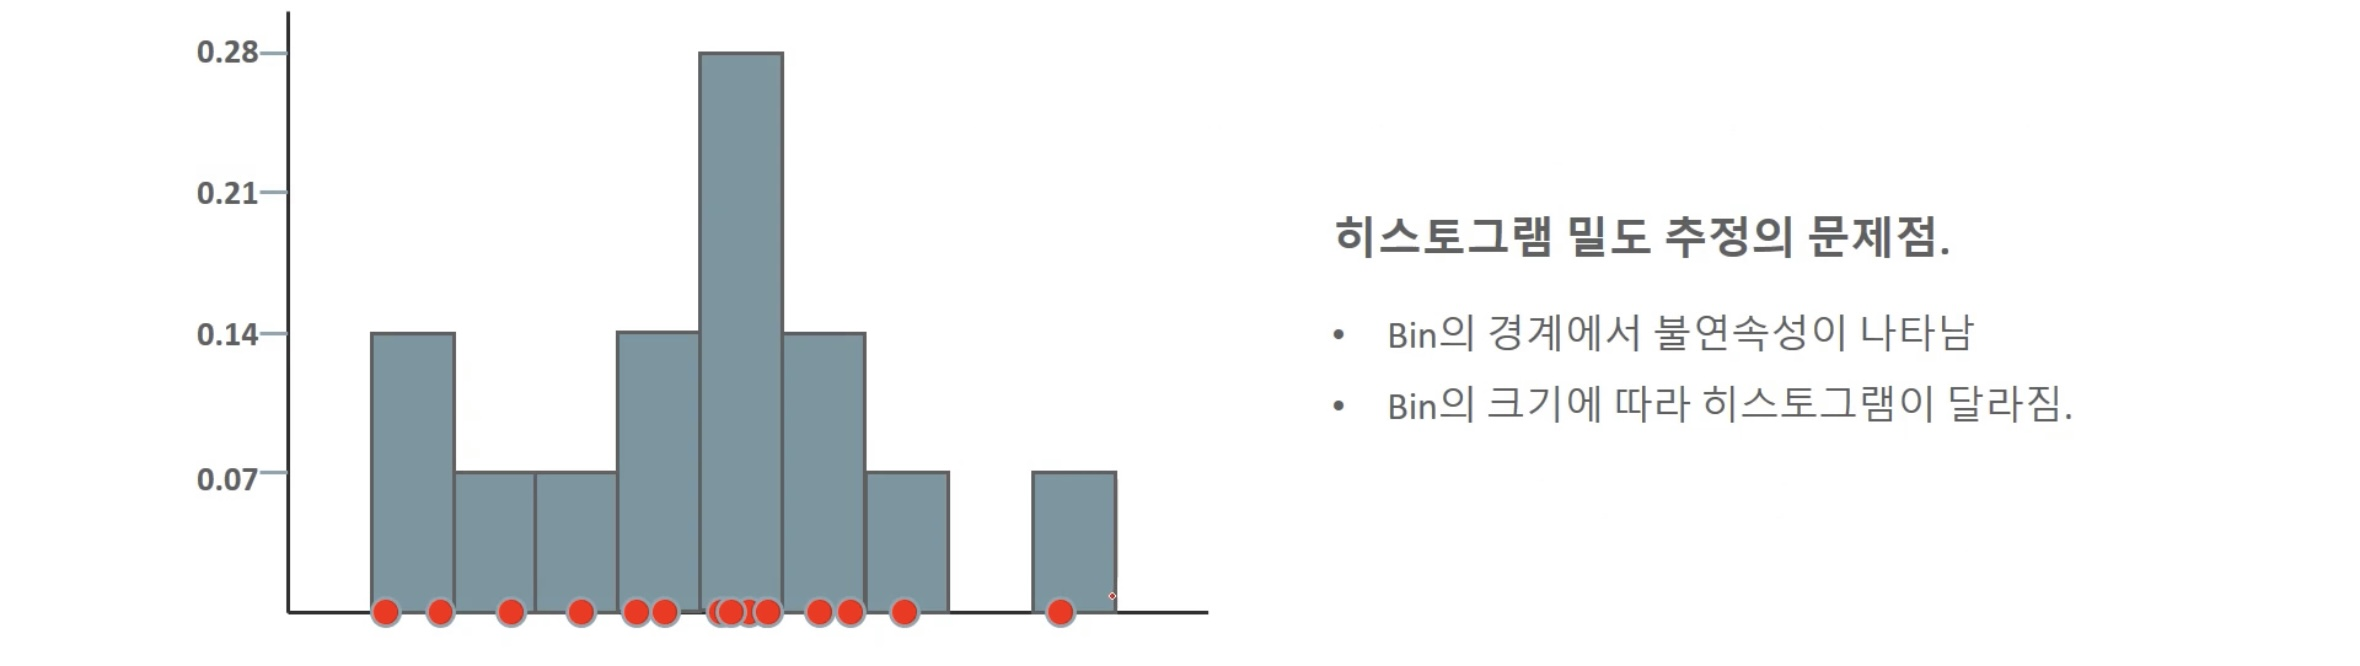

## 비모수적 밀도 추정 - KDE
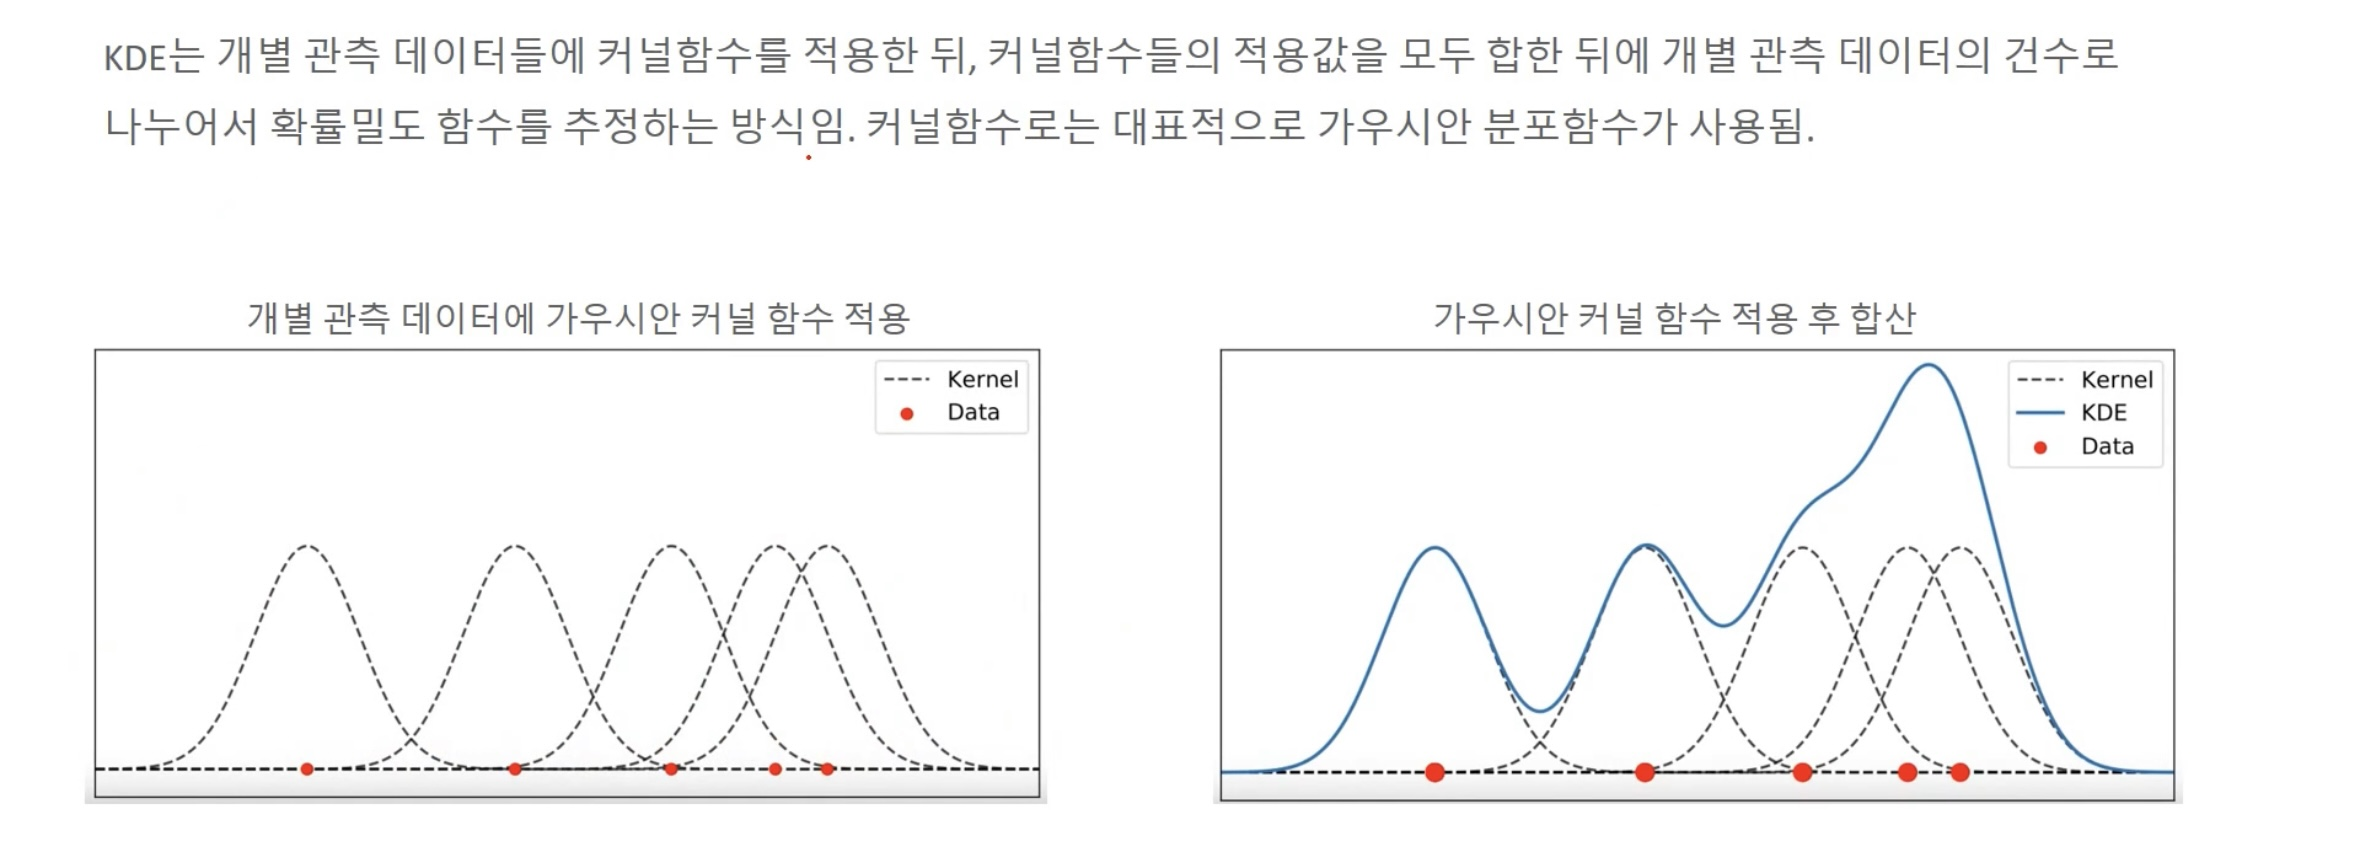

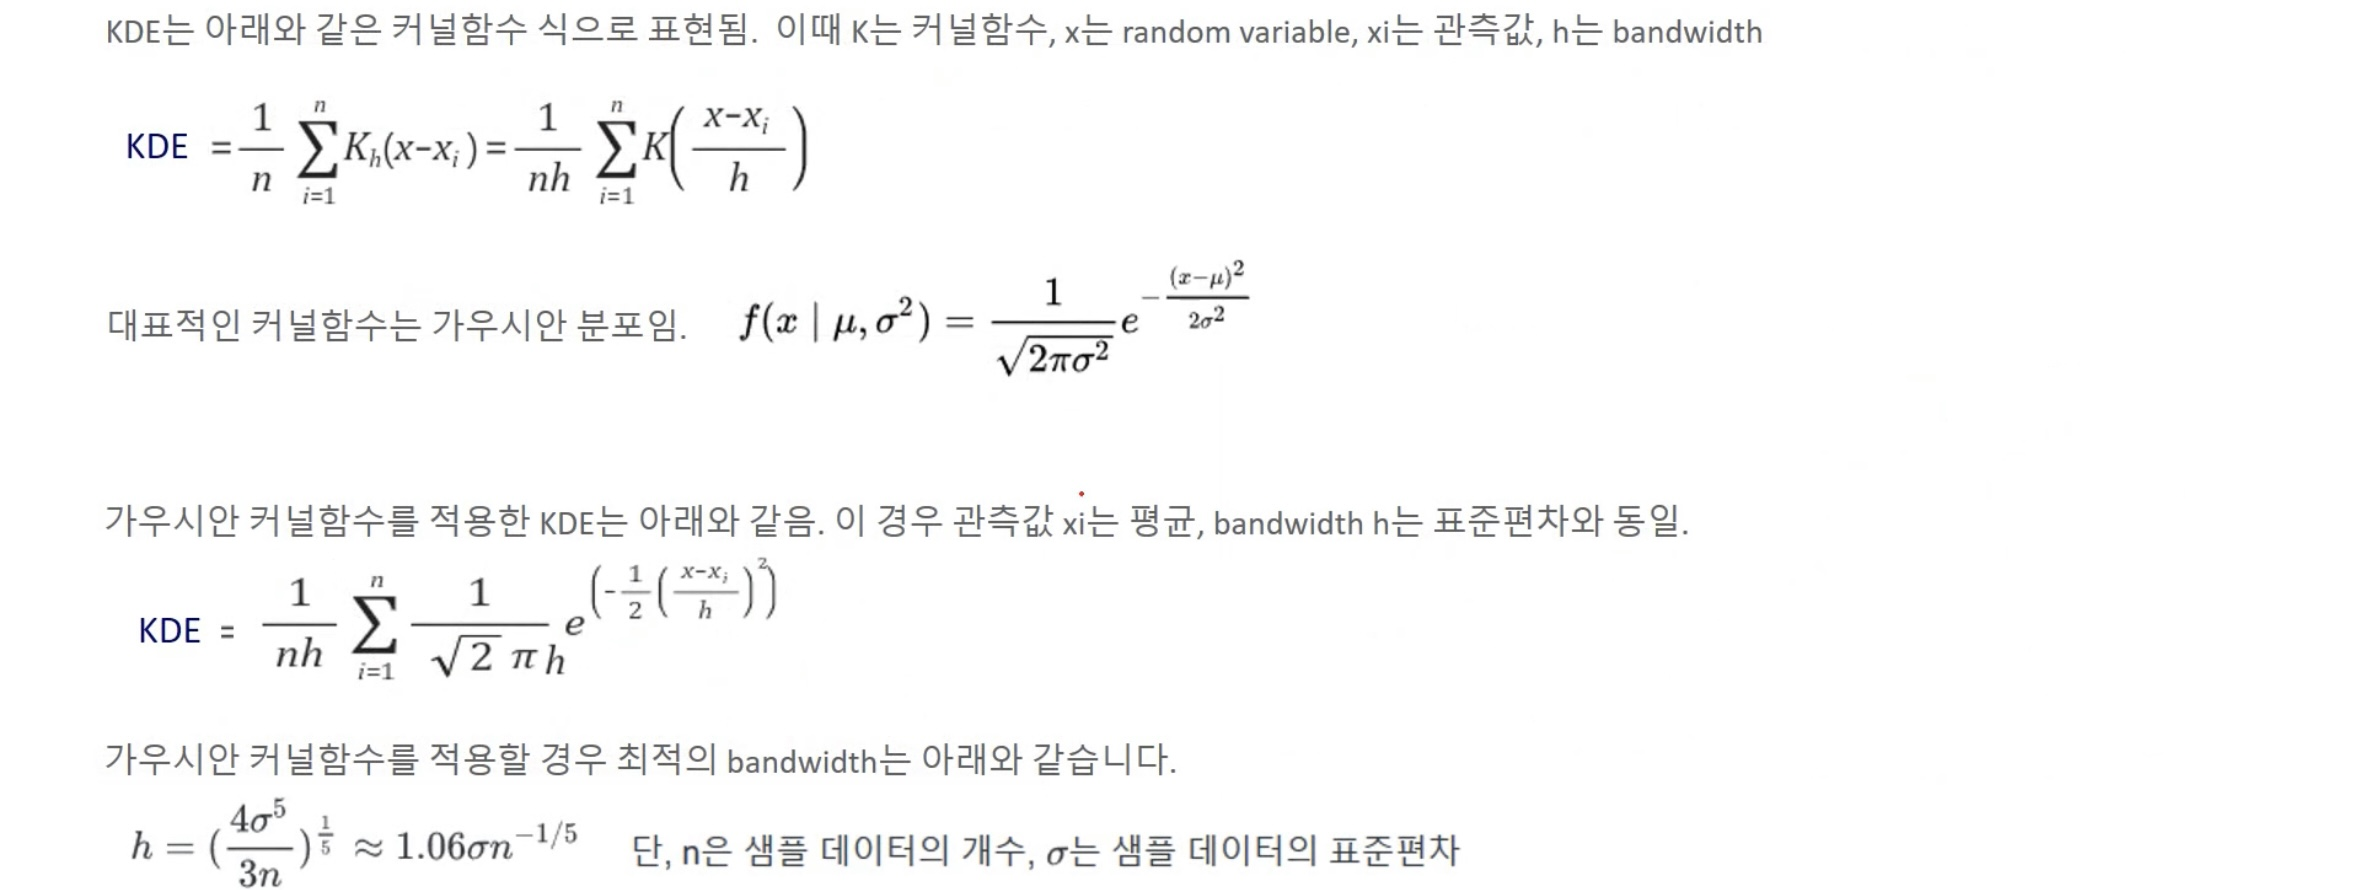

## Bandwidth에 따른 KDE의 변화
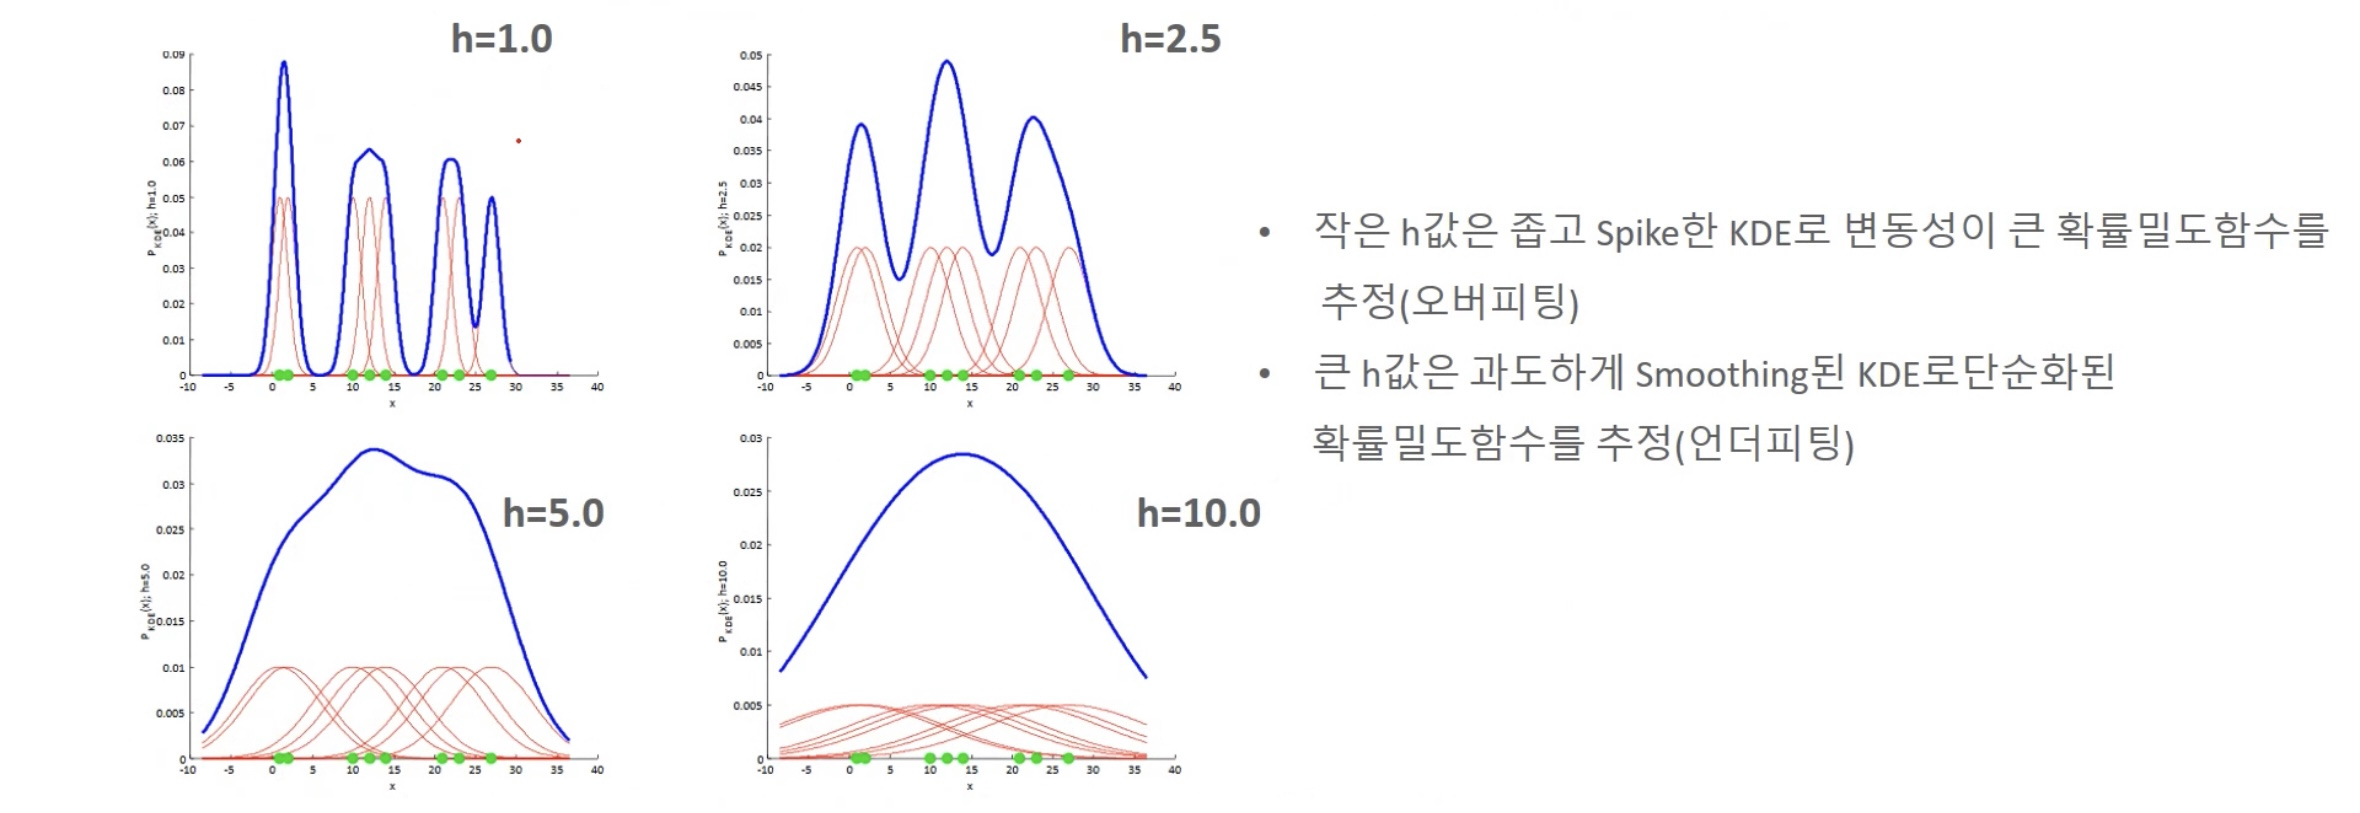

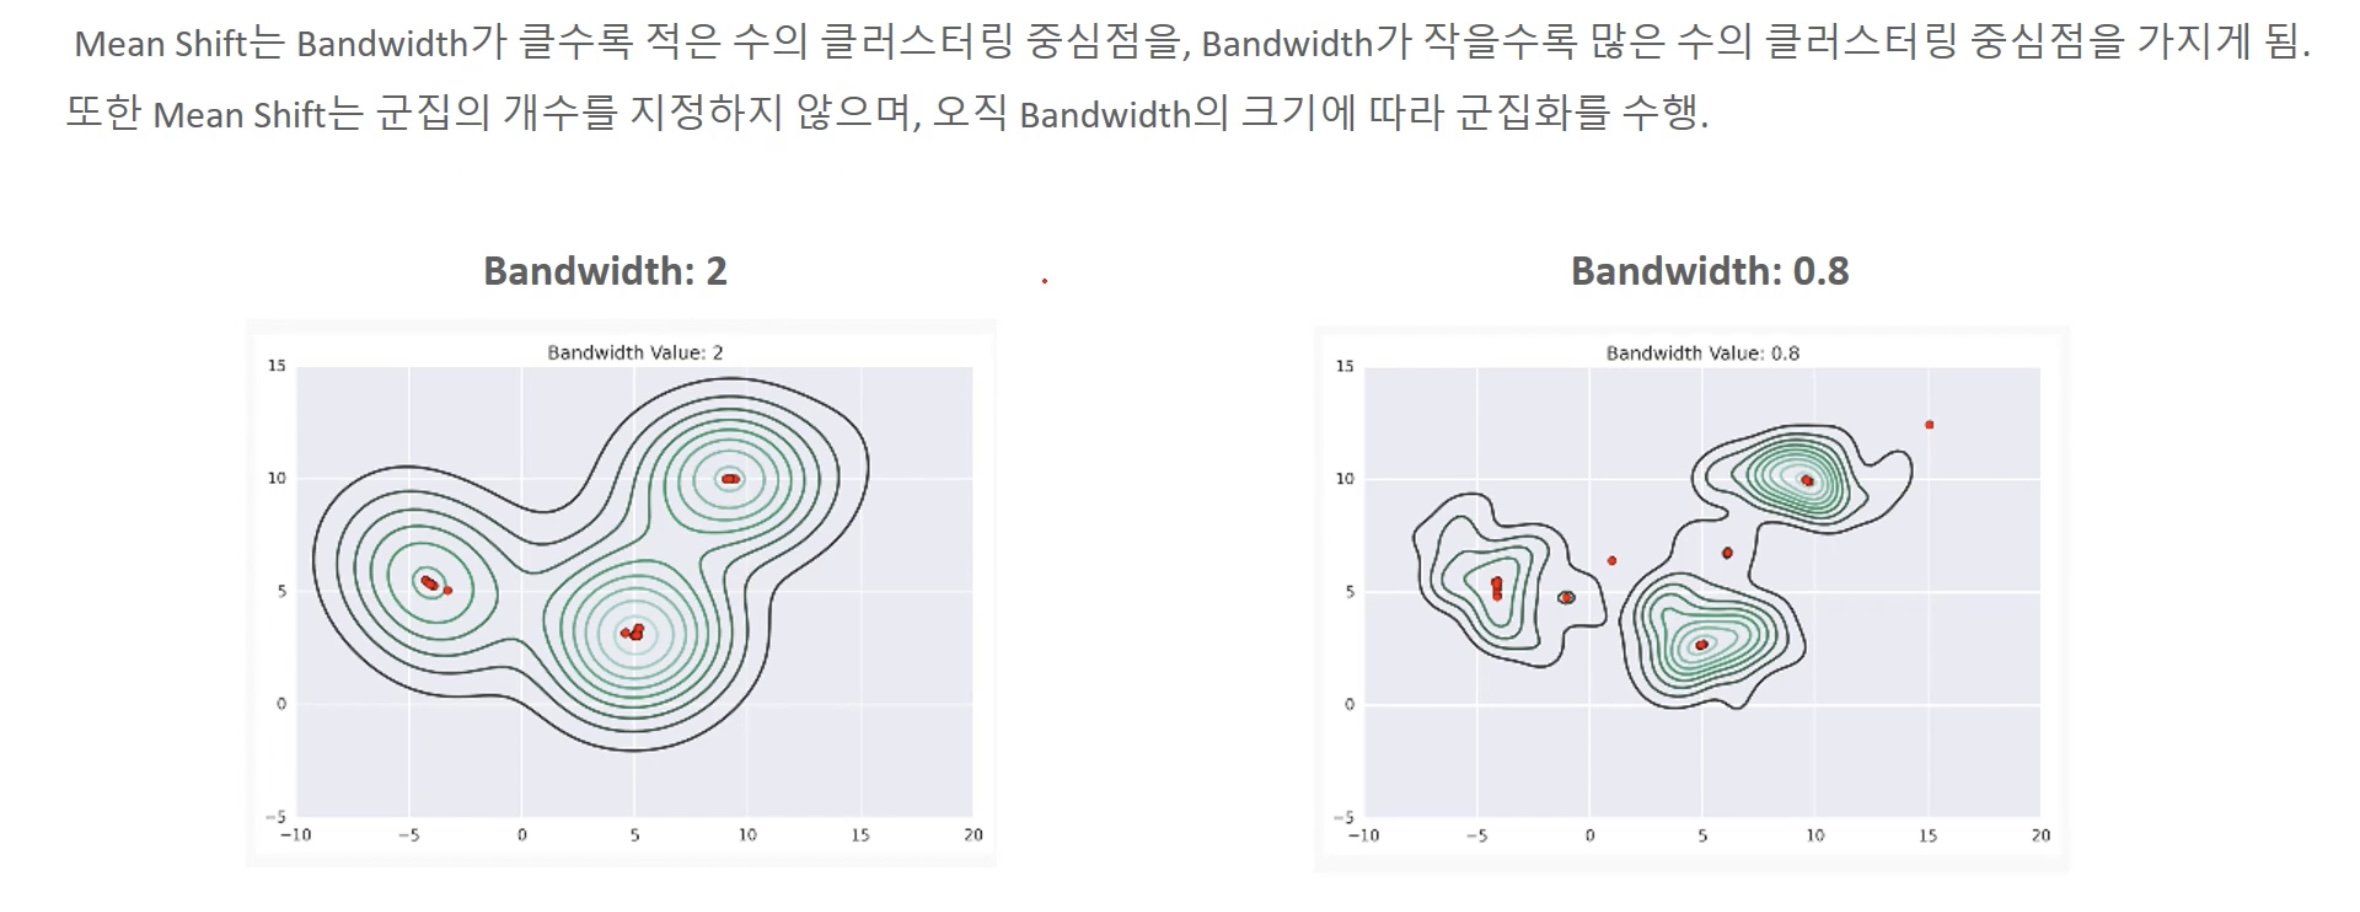

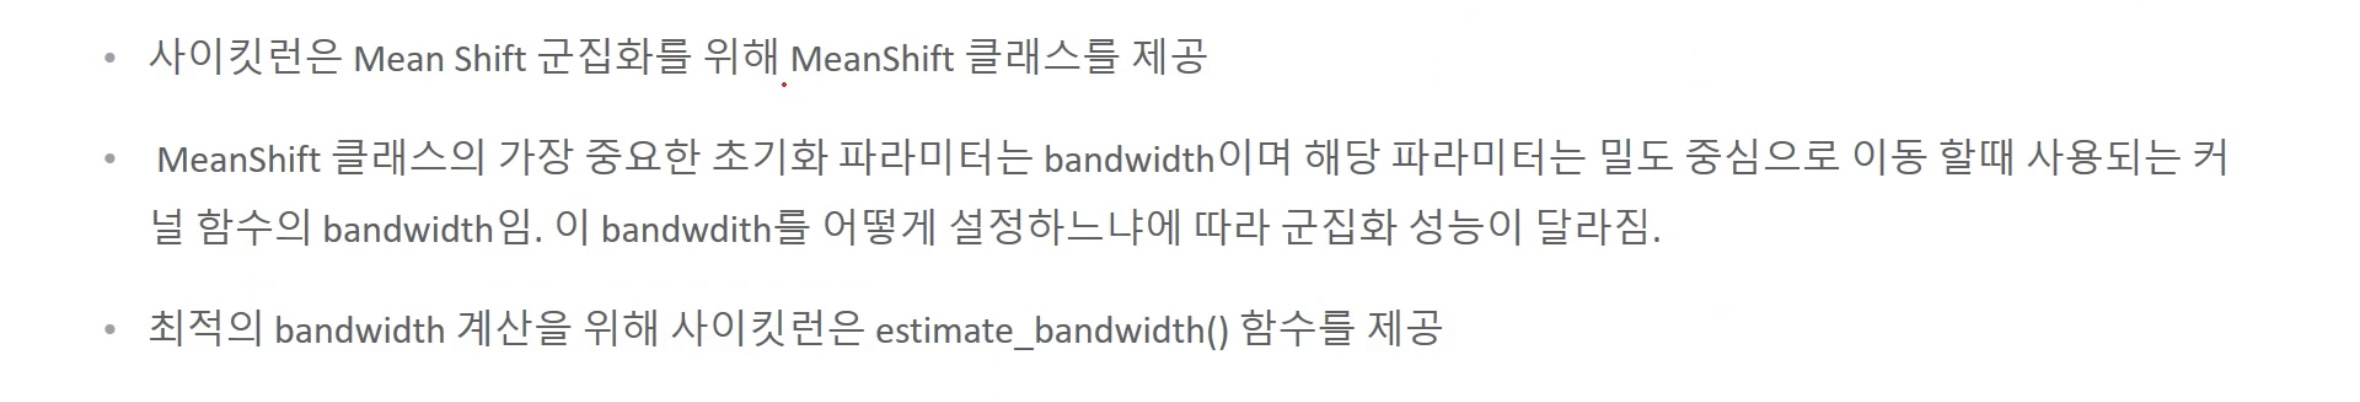

#### seaborn의 distplot()을 이용하여 KDE 시각화 

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

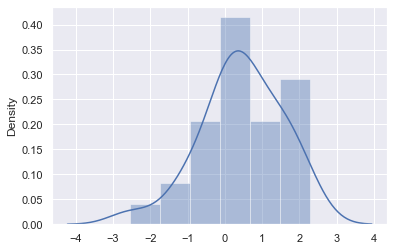

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x)

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

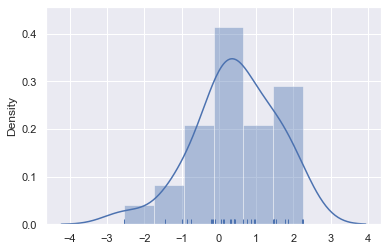

In [2]:
sns.distplot(x, rug=True) # 30개의 데이터의 밀집도

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

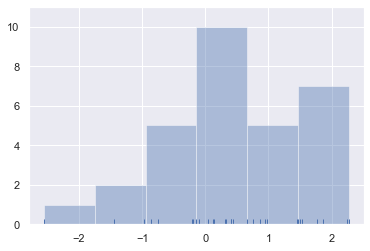

In [3]:
sns.distplot(x, kde=False, rug=True)

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

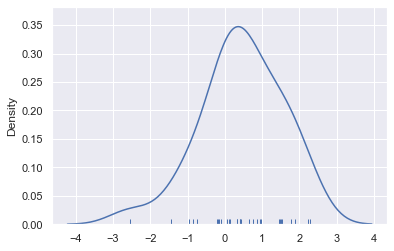

In [4]:
sns.distplot(x, hist=False, rug=True)

#### 개별 관측데이터에 대해 가우시안 커널 함수를 적용

<AxesSubplot:>

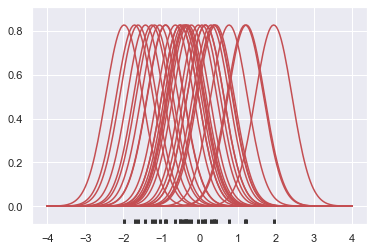

In [6]:
from scipy import stats 

# x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size**(-1/5.)
support = np.linspace(-4, 4, 200) # -4~4까지 200개

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support) # 표준편차 -> bandwidth
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')

sns.rugplot(x, color='.2', linewidth=3)

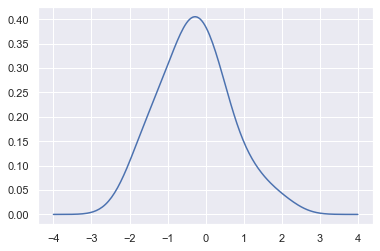

In [11]:
from scipy.integrate import trapz

density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

#### seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음 

<AxesSubplot:ylabel='Density'>

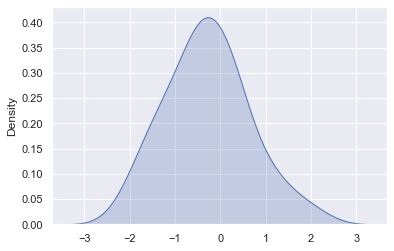

In [12]:
sns.kdeplot(x, shade=True)

#### bandwidth에 따른 KDE 변화

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


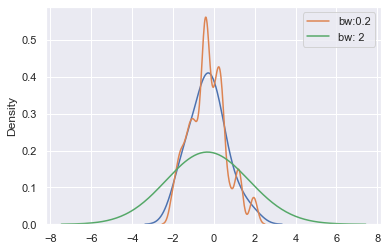

In [17]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw:0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### 사이킷런을 이용한 Mean Shift

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift 

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


#### 커널함수의 bandwidth 크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행

In [19]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


#### 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행 

In [21]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.25) # quantile이 커지면 더 많은 데이터들이 샘플링 계산시 제외 
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [23]:
import pandas as pd 

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산 
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


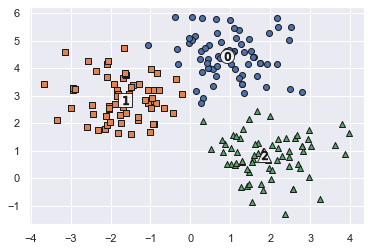

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [28]:
clusterDF

,ftr1,ftr2,target,meanshift_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [25]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
